In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path

### Prepare The Data
Standardizing Data for ML

In [2]:
file_path = "./data/myopia.csv"
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df2 = df.drop("MYOPIC", axis=1)
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

### Apply Dimensionality Reduction
 - Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.
 
1. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

2. Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [14]:
#Initialize PCA model
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [15]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [16]:
df2["x"] = transformed_features[:,0]
df2["y"] = transformed_features[:,1]
df2["class"] = df["MYOPIC"]
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-12.251809,-2.878908,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,11.817673,-10.205964,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,3.253071,15.932497,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,16.383190,-2.106748,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-21.498131,-13.001725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,-3.538062,-6.789929,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,11.577611,-9.578408,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,12.381621,-8.270881,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,9.870920,21.130400,0


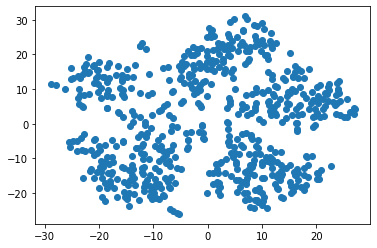

In [17]:
plt.scatter(df2["x"], df2["y"])
plt.show()

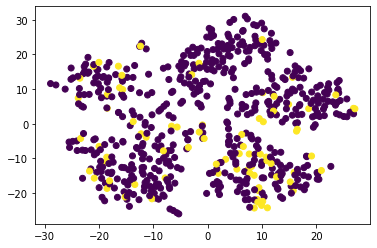

In [18]:
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

###  Perform a Cluster Analysis with K-means
- Create an elbow plot to identify the best number of clusters. Make sure to do the following:

1. Use a for loop to determine the inertia for each k between 1 through 10.

2. If possible, determine where the elbow of the plot is, and at which value of k it appears. 

C:\Users\mpddr\.conda\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


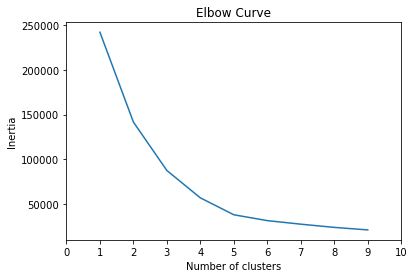

In [19]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,241979.000000
1,2,141694.734375
2,3,87644.484375
3,4,57124.152344
4,5,38241.753906


In [21]:
len(pca.components_)

10

In [22]:
# Initialize PCA model
pca = PCA(n_components=10)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(pca_transformed_data)

In [24]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca,
    columns=["1","2","3","4","5","6","7","8","9","10"],)
# Add the predicted class columns
df_myopia_pca.head()

,1,2,3,4,5,6,7,8,9,10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [34]:
pca.explained_variance_ratio_

array([0.23050529, 0.17044846, 0.09456494, 0.09036067, 0.08255752,
       0.07616853, 0.07060772, 0.06941936, 0.05870745, 0.05666008])

### Predicting clusters with K=3 

In [35]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column to the dataframe
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head(30)

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0
5,-0.352605,2.019888,-0.006843,-1.415177,-0.759984,1.157975,0.740059,0.164110,1.250569,-1.401525,1
6,-0.335692,1.403542,-0.082447,-0.102080,-1.401532,0.737557,1.706826,-0.069387,0.388999,0.102258,1
7,-1.456695,-0.991883,1.001543,-0.731960,0.022628,-0.118257,-0.486553,-0.102932,-1.067021,-0.118232,1
8,-0.436809,-1.175823,2.003959,-0.223928,1.292552,1.011184,0.273048,0.377192,-0.145739,0.087149,0
9,-0.018199,0.552820,0.634571,-1.842772,-1.452535,-0.943217,0.103679,-1.057678,-0.794826,0.819197,1


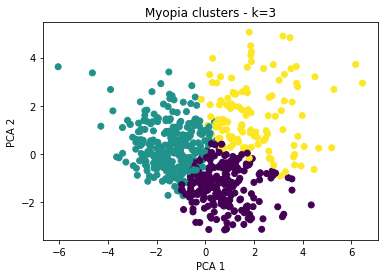

In [36]:
# Plot the Clusters
plt.scatter(x=df_myopia_pca["1"], y=df_myopia_pca["2"], c=df_myopia_pca["class"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Myopia clusters - k=3")
plt.show()

###  Predicting Cluster with k=4 (for comparison purposes)

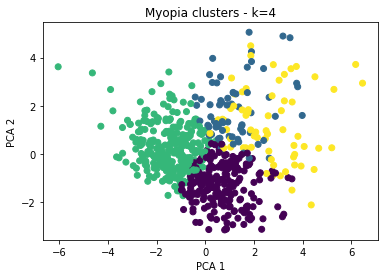

In [37]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column to the dataframe
df_myopia_pca["class"] = model.labels_


# Plot the Clusters
plt.scatter(x=df_myopia_pca["1"], y=df_myopia_pca["2"], c=df_myopia_pca["class"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Myopia clusters - k=4")
plt.show()

## Recommendation: 
- Based on above findings/analysis, it is clear that k=3 or best number of clusters that represent the data is 3